# 第 3 节　logistic 回归
## 第 6 章　广义线性模型｜用 Python 动手学统计学



### 10. 环境准备

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline


### 11. 实现：读取数据并可视化

In [2]:
# 读取数据
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


<AxesSubplot:xlabel='hours', ylabel='result'>

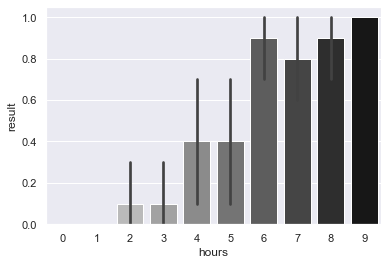

In [3]:
# 可视化
sns.barplot(x = "hours",y = "result", 
            data = test_result, palette='gray_r')

In [4]:
# 学习时间与合格率的关系
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 12. 实现：logistic 回归

In [5]:
# 建模
mod_glm = smf.glm(formula = "result ~ hours", 
                  data = test_result, 
                  family=sm.families.Binomial()).fit()

In [6]:
# 参考: 指定联系函数
logistic_reg = smf.glm(formula = "result ~ hours", 
                       data = test_result, 
                       family=sm.families.Binomial(link=sm.families.links.logit)).fit()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


### 13. 实现：logistic 回归的结果

In [7]:
# 打印估计的结果
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Wed, 17 Nov 2021   Deviance:                       68.028
Time:                        18:00:57   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### 14. 实现：模型选择

In [8]:
# 空模型
mod_glm_null = smf.glm(
    "result ~ 1", data = test_result, 
    family=sm.families.Binomial()).fit()

In [9]:
# 对比 AIC
print("空模型　　　：", mod_glm_null.aic.round(3))
print("学习时间模型：", mod_glm.aic.round(3))

空模型　　　： 139.989
学习时间模型： 72.028


### 15. 实现：回归曲线

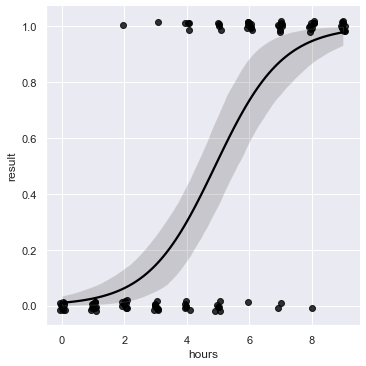

In [10]:
# 用 lmplot 绘制 logistic 回归曲线
sns.lmplot(x = "hours", y = "result",
           data = test_result, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

### 16. 实现：预测成功概率

In [11]:
# 0~9 上公差为 1 的等差数列
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
# 成功概率的预测值
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 19. logistic 回归的系数与优势比的关系

In [12]:
# 学习时间为 1 小时的合格率
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 学习时间为 2 小时的合格率
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [13]:
# 优势
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# 对数优势比
sp.log(odds_2 / odds_1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  


array([0.929])

In [14]:
# 系数
mod_glm.params["hours"]

0.9288901756284946

In [15]:
# 补充: 系数为 e 的指数时，其结果就是优势比
sp.exp(mod_glm.params["hours"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


2.5316978778757737